In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/Users/smituplenchwar/Downloads/Tree_Inventory_20241010.csv")

In [5]:
df.describe()

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Leaf Surface Area (in sq. ft.),Address,Site,Park Name,Latitude,Longitude,Site ID
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.0,7541.000000,7541.000000,7541.000000
mean,8.464792,74.874368,3.984777,498.099853,0.353080,69.183592,51.641757,30.238763,45.812212,16.918380,2.837270,0.464112,37.460310,62.259902,5414.655616,1.963798,0.0,42.910519,-78.854246,68266.425540
std,8.011049,59.582939,6.178015,772.197999,0.583742,107.237577,99.987071,30.009951,49.036840,16.449956,4.303056,0.697634,27.166893,45.149682,70787.483692,6.697827,0.0,0.032237,0.029093,39600.714584
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,42.831970,-78.911724,15.000000
25%,3.000000,19.810000,0.570000,70.750000,0.020000,2.850000,1.570000,7.290000,8.840000,4.350000,0.200000,0.030000,10.780000,17.920000,74.000000,1.000000,0.0,42.890289,-78.876630,35789.000000
50%,3.000000,63.450000,1.400000,174.960000,0.120000,20.660000,17.150000,10.450000,13.530000,6.070000,1.110000,0.170000,38.930000,64.700000,198.000000,1.000000,0.0,42.912365,-78.857609,63628.000000
75%,14.000000,111.330000,4.910000,613.700000,0.320000,78.620000,24.830000,55.490000,87.390000,30.720000,2.310000,0.450000,51.820000,86.120000,438.000000,1.000000,0.0,42.939120,-78.829475,109718.000000
max,179.000000,458.480000,54.550000,6818.960000,6.560000,679.030000,1591.720000,170.640000,329.780000,88.380000,30.260000,4.670000,241.990000,402.180000,999999.000000,111.000000,0.0,42.964843,-78.799193,133159.000000


In [7]:
df.shape

(7541, 28)

In [9]:
# 3. Handle missing entries -

df.isnull().sum()

Editing                           0
Botanical Name                    0
Common Name                       0
DBH                               0
Total Yearly Eco Benefits ($)     0
Stormwater Benefits ($)           0
Stormwater Gallons Saved          0
Greenhouse CO2 Benefits ($)       0
CO2 Avoided (in lbs.)             0
CO2 Sequestered (in lbs.)         0
Energy Benefits ($)               0
kWh Saved                         0
Therms Saved                      0
Air Quality Benefits ($)          0
Pollutants Saved (in lbs.)        0
Property Benefits ($)             0
Leaf Surface Area (in sq. ft.)    0
Address                           0
Street                            0
Side                              0
Site                              0
Council District                  0
Park Name                         0
Latitude                          0
Longitude                         0
Site ID                           0
Location                          0
location                    

In [11]:
# 3. As we can see that there are no null or missing entries in the dataset, so we will not need to make any changes to the dataset


In [13]:
# Step 4: Handling mismatched string formats 

df['Common Name'] = df['Common Name'].str.capitalize()
df['Botanical Name'] = df['Botanical Name'].str.capitalize()

In [15]:
# Step 5: Handle outliers. Detect and manage outliers within the dataset.

df = df.drop(columns=['Editing','Latitude','Longitude','Location','location','Street'])

df_outliers = df.select_dtypes(include=[np.number])

for column in df_outliers.columns:
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[(z_scores.abs() > 3)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(column," - ",outlier_percentage)

DBH  -  0.34478185916987136
Total Yearly Eco Benefits ($)  -  1.3791274366794855
Stormwater Benefits ($)  -  3.209123458427264
Stormwater Gallons Saved  -  3.209123458427264
Greenhouse CO2 Benefits ($)  -  3.049993369579631
CO2 Avoided (in lbs.)  -  2.798037395570879
CO2 Sequestered (in lbs.)  -  1.4189099588913936
Energy Benefits ($)  -  0.8884763293992839
kWh Saved  -  0.9149980108738895
Therms Saved  -  0.8884763293992839
Air Quality Benefits ($)  -  3.063254210316934
Pollutants Saved (in lbs.)  -  3.036732528842329
Property Benefits ($)  -  2.015647792070017
Leaf Surface Area (in sq. ft.)  -  2.015647792070017
Address  -  0.5039119480175043
Site  -  1.2199973478318524
Park Name  -  0.0
Site ID  -  0.0


In [17]:
#Using the Z-score method to deal with outliers -

df_outliers = df.select_dtypes(include=[np.number])

for column in df_outliers.columns:
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    df[column] = np.where((z_scores.abs() > 3),df[column].mean(), df[column])

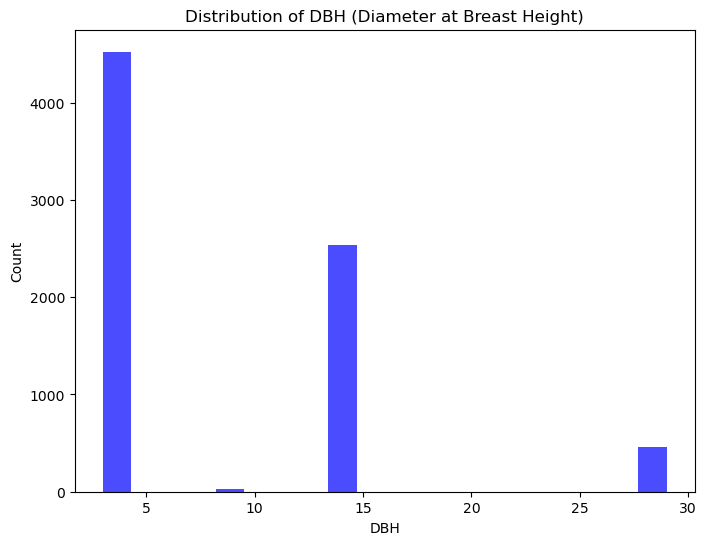

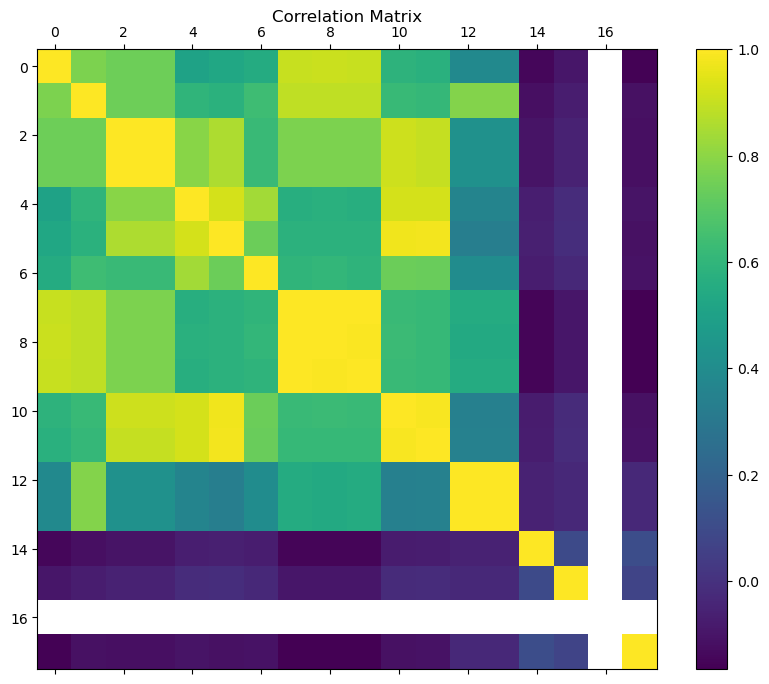

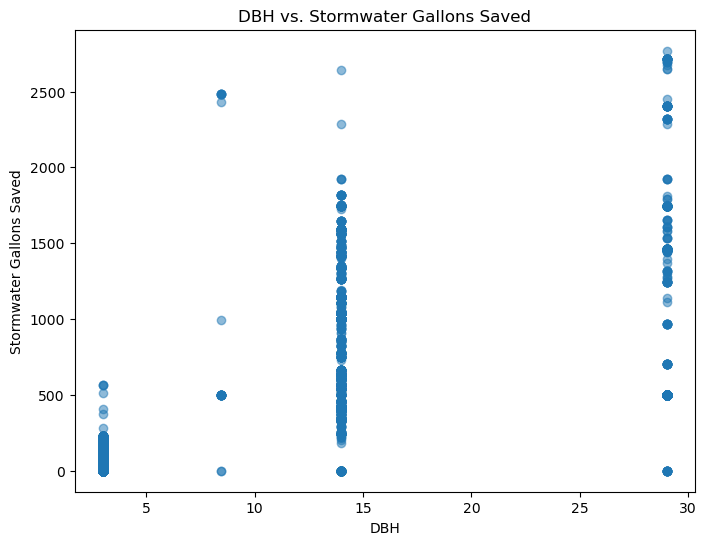

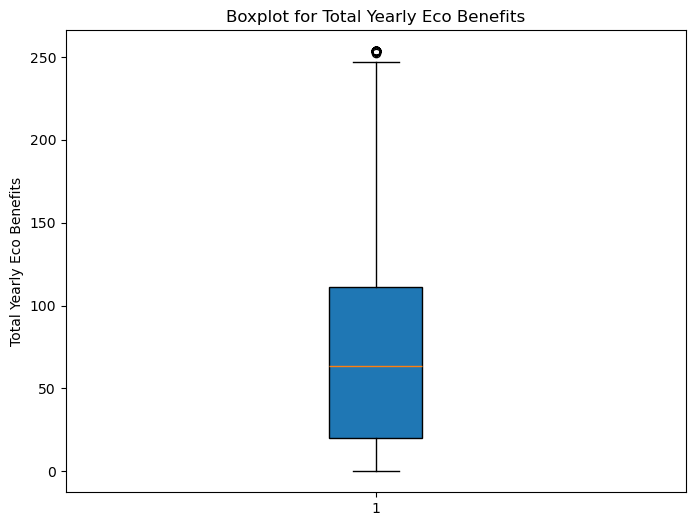

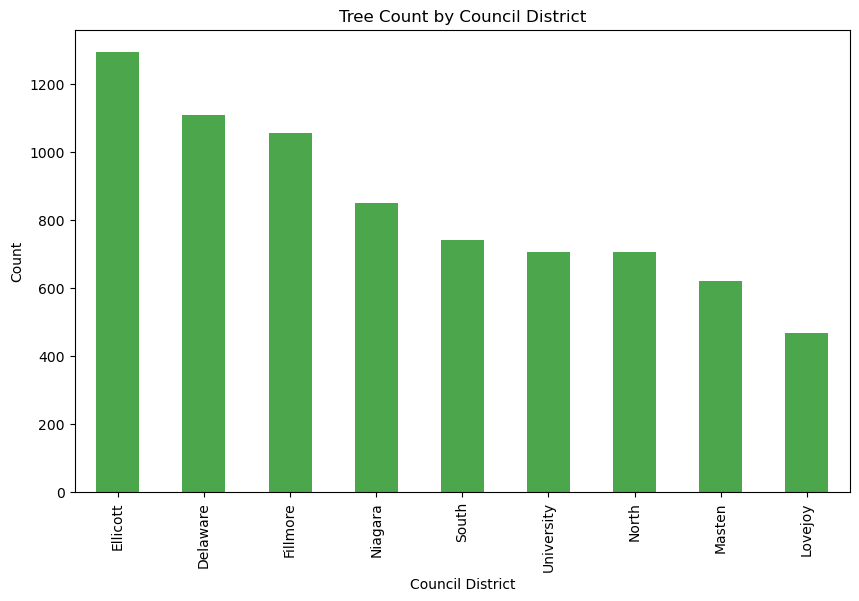

In [19]:
# Step 6: Data Visualization 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['DBH'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of DBH (Diameter at Breast Height)')
plt.xlabel('DBH')
plt.ylabel('Count')
plt.show()

df_numerical = df.select_dtypes(include=[np.number])

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['DBH'], df['Stormwater Gallons Saved'], alpha=0.5)
plt.title('DBH vs. Stormwater Gallons Saved')
plt.xlabel('DBH')
plt.ylabel('Stormwater Gallons Saved')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['Total Yearly Eco Benefits ($)'], patch_artist=True)
plt.title('Boxplot for Total Yearly Eco Benefits')
plt.ylabel('Total Yearly Eco Benefits')
plt.show()

plt.figure(figsize=(10, 6))
df['Council District'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Tree Count by Council District')
plt.xlabel('Council District')
plt.ylabel('Count')
plt.show()


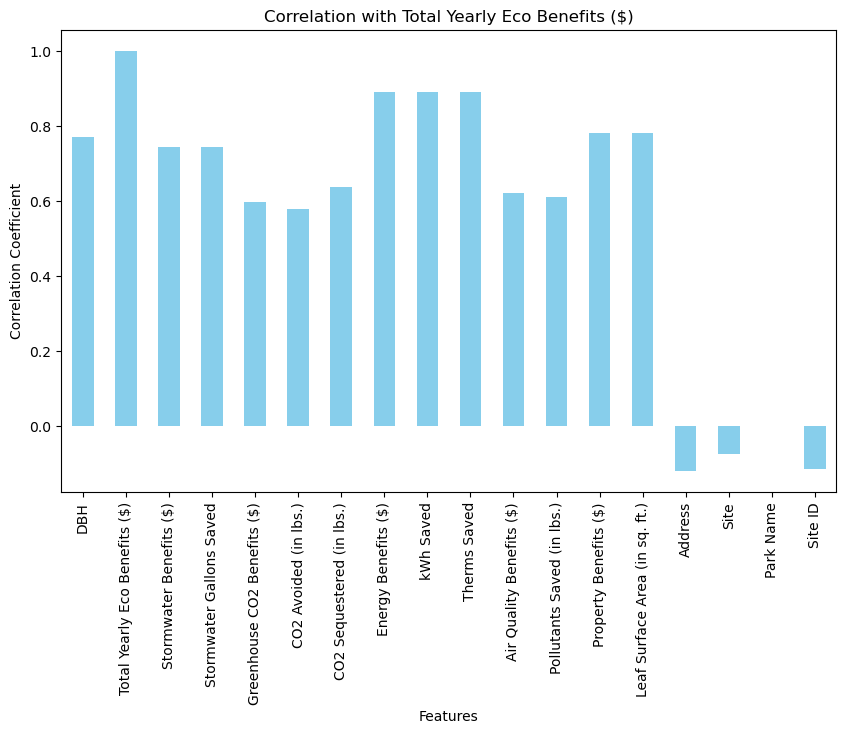

In [20]:
# 7. Identify uncorrelated or unrelated features.

#Here, we will choose column "Total Yearly Eco Benefits ($)" as the target and we will plot a correlation matrix with respect to the target



target = 'Total Yearly Eco Benefits ($)'
correlation_matrix = df_numerical.corr()[target]

plt.figure(figsize=(10, 6))
correlation_matrix.plot(kind='bar', color='skyblue')
plt.title(f'Correlation with {target}')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

In [23]:
# Observing the trends of all the festures, we will set the threshold as 0.1  and drop the columns with
# correlation coeficient less than 0.1

Columns_to_drop = correlation_matrix[correlation_matrix.abs() < 0.1].index

df = df.drop(columns=Columns_to_drop)

In [25]:
df.describe()

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Leaf Surface Area (in sq. ft.),Address,Park Name,Site ID
count,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.000000,7541.0,7541.000000
mean,8.296258,71.954637,3.155122,394.395782,0.283783,58.481702,43.760858,29.305692,44.135742,16.418545,2.334246,0.385636,35.503007,59.006855,402.826272,0.0,68266.425540
std,7.338227,53.888040,3.844428,480.485382,0.408241,84.776684,71.316545,28.303298,45.714834,15.559445,3.129244,0.522133,23.208298,38.570180,630.857290,0.0,39600.714584
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,15.000000
25%,3.000000,19.810000,0.570000,70.750000,0.020000,2.850000,1.570000,7.290000,8.840000,4.350000,0.200000,0.030000,10.780000,17.920000,74.000000,0.0,35789.000000
50%,3.000000,63.450000,1.400000,174.960000,0.120000,20.660000,17.150000,10.450000,13.530000,6.070000,1.110000,0.170000,38.110000,63.340000,198.000000,0.0,63628.000000
75%,14.000000,111.330000,3.984777,498.099853,0.320000,69.183592,24.830000,55.490000,87.390000,30.720000,2.310000,0.450000,51.110000,84.950000,438.000000,0.0,109718.000000
max,29.000000,253.470000,22.150000,2769.100000,2.100000,383.540000,326.950000,120.070000,192.650000,66.110000,15.650000,2.550000,118.830000,197.490000,5414.655616,0.0,133159.000000


In [27]:
df.shape

(7541, 21)

In [29]:
# We dropped 4 columns based on our correlation threshold

In [31]:
# 8. Convert features with string datatype to categorical (e.g., species, island). Possible ways:

# We will use 1 hot encoding

df = pd.get_dummies(df, columns=['Common Name', 'Council District','Botanical Name','Side'], drop_first=True)


In [33]:
df.shape

(7541, 452)

In [35]:
#Here, we have converted all the columns with categorical datatype into integer, which are currently of for bool

In [37]:
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)


In [39]:
# 9. Normalize non-categorical features -  

for col in df:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

In [41]:
df.head(5)

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,...,Botanical Name_Zelkova serrata,Botanical Name_Zelkova serrata 'green vase',Botanical Name_Zelkova serrata 'musashino',Botanical Name_Zelkova serrata 'village green',Botanical Name_Zelkova serrata 'wireless',Side_Front,Side_In_Lot,Side_Median,Side_Rear,Side_Side
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.406557,0.629797,0.629569,0.380952,0.723627,0.000000,0.640043,0.584532,0.656028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.062887,0.023476,0.023340,0.033333,0.037988,0.026640,0.037811,0.030677,0.039782,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.240581,0.064560,0.064599,0.057143,0.051181,0.063190,0.056550,0.041318,0.060959,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.240541,0.025282,0.025416,0.009524,0.007431,0.005995,0.087033,0.070231,0.091817,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
df['Total Yearly Eco Benefits ($)'].describe()

count    7541.000000
mean        0.283878
std         0.212601
min         0.000000
25%         0.078155
50%         0.250325
75%         0.439224
max         1.000000
Name: Total Yearly Eco Benefits ($), dtype: float64

In [45]:
#We will convert our target column into binary, to implement logistic regression

In [47]:
df['Total Yearly Eco Benefits ($)'] = df['Total Yearly Eco Benefits ($)'].apply(lambda x: 1 if x>0.28 else 0)

In [49]:
df.head(10)

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,...,Botanical Name_Zelkova serrata,Botanical Name_Zelkova serrata 'green vase',Botanical Name_Zelkova serrata 'musashino',Botanical Name_Zelkova serrata 'village green',Botanical Name_Zelkova serrata 'wireless',Side_Front,Side_In_Lot,Side_Median,Side_Rear,Side_Side
0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.000000,1,0.629797,0.629569,0.380952,0.723627,0.000000,0.640043,0.584532,0.656028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0,0.023476,0.023340,0.033333,0.037988,0.026640,0.037811,0.030677,0.039782,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0,0.064560,0.064599,0.057143,0.051181,0.063190,0.056550,0.041318,0.060959,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0,0.025282,0.025416,0.009524,0.007431,0.005995,0.087033,0.070231,0.091817,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.000000,0,0.038375,0.038489,0.057143,0.060515,0.052455,0.067960,0.048897,0.073514,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.423077,1,0.145824,0.145668,0.038095,0.044871,0.033767,0.422753,0.424656,0.422175,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.000000,0,0.038375,0.038489,0.057143,0.060515,0.052455,0.067960,0.048897,0.073514,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.000000,0,0.042438,0.042472,0.066667,0.070110,0.060774,0.067960,0.048897,0.073514,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.000000,0,0.038375,0.038489,0.057143,0.060515,0.052455,0.067960,0.048897,0.073514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
# 3. Create the data matrices for X (input) and Y (target) in a shape X = 𝑁 x 𝑑 and Y =
# 𝑁 x 1, were 𝑁 is a number of data samples and 𝑑 has a number of features.

# Creating the target (Y) matrix
Y = df['Total Yearly Eco Benefits ($)'].values.reshape(-1, 1)

# Updating the input (X) by dropping the 'gender_encoded' column
X = df.drop(columns=['Total Yearly Eco Benefits ($)']).values

# Display the shapes of X and Y matrices
X_shape = X.shape
Y_shape = Y.shape

X_shape, Y_shape

((7541, 451), (7541, 1))

In [53]:
# 4. Divide the dataset into training and test, as 80% training and 20% testing dataset.

# We will keep the split precenatge as  - (80% training, 20% testing)
split_ratio = 0.8
N = X.shape[0]

# Calculate the number of training samples
train_len = int(N * split_ratio)

# As the dataset is listed in oreder of species, we will generate shuffled indices
shuffled_indices = np.random.permutation(N)

# We will Split the indices for training and testing
train_indices = shuffled_indices[:train_len]
test_indices = shuffled_indices[train_len:]

# Now we will split the dataset
X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]


In [55]:
# 5. Print the shape of your X_train, y_train, X_test, y_test

(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((6032, 451), (6032, 1)), ((1509, 451), (1509, 1)))

In [57]:
# 6. code to define logistic regression:

class LogitRegression():
    def __init__(self, learning_rate, iterations):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        #sigmoid function
        return 1 / (1 + np.exp(-z))

    def cost(self, X, y):
        # Loss function for Logistic Regression
        N = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (1 / N) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y):
        N = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        dw = (1 / N) * np.dot(X.T, (h - y))
        db = (1 / N) * np.sum(h - y)
        
        # Update the weights and bias using the gradient descent rule
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        # Initializing the weights and bias
        N, d = X.shape
        self.weights = np.random.uniform(0, 1,(d, 1))
        self.bias = 0
        self.loss = []

        # Performing the training process with gradient descent
        for i in range(self.iterations):
            self.gradient_descent(X, y)
            cost_value = self.cost(X, y)
            self.loss.append(cost_value)

            #if i % 1000 == 0:
                #print(f"Iteration {i}, Cost: {cost_value}")

    def predict(self, X):
        # Prediction of the binary output based on the trained model
        linear_model = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(linear_model)
        y_pred = np.where(y_hat >= 0.5, 1, 0)
        return y_pred

    
    def plot_loss(self):
        # Plotting the loss graph
        iterations = list(range(1, len(self.loss) + 1))
        loss_values = self.loss

        plt.figure(figsize=(8, 6))
        plt.plot(iterations, loss_values, label='Loss', color='blue')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve Over Iterations')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Print out the loss values for each iteration
        #for i, loss in enumerate(loss_values):
            #print(f"Iteration {i + 1}: Loss = {loss}")


In [59]:
# Defining a function to calulate the accuracy

def accuracy(y_true, y_pred):
    #y_true = np.array(y_true)
    #y_pred = np.array(y_pred)
    
    # Calculate the total number of correct predictions
    correct_predictions = np.sum(y_true == y_pred)
    
    # Calculate accuracy as a percentage
    accuracy = correct_predictions / len(y_true) * 100
    
    return accuracy

In [61]:
# Calling LogitRegression class to define a model
model = LogitRegression(learning_rate=1e-3, iterations=100000)

# Training the model using the training dataset by calling the fit function
model.fit(X_train, Y_train)

# Make predictions on the test set
pred = model.predict(X_test)

# Calculate accuracy
acc = accuracy(Y_test, pred)
print(f"Accuracy: {acc:.2f}%")

Accuracy: 53.61%


In [63]:
import pickle

model_weights = {
    "weights": model.weights, 
    "bias": model.bias         
}

with open("gsingh55_smituple_assignment1_bonus.pickle", "wb") as file:
    pickle.dump(model_weights, file)